In [1]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d georgesaavedra/covid19-dataset


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/georgesaavedra/covid19-dataset
License(s): CC0-1.0
  0% 0.00/9.09M [00:00<?, ?B/s]
100% 9.09M/9.09M [00:00<00:00, 1.05GB/s]


In [4]:
import zipfile
with zipfile.ZipFile("covid19-dataset.zip", "r") as z:
    z.printdir()


File Name                                             Modified             Size
owid-covid-data.csv                            2022-03-07 02:06:16     47406460


In [5]:
import pandas as pd

df = pd.read_csv("covid19_dataset/owid-covid-data.csv")

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

((166326, 67), None)

In [7]:
df.head()

df.describe(include='all')

df.columns.tolist()


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [14]:
df['date'] = pd.to_datetime(df['date'])

print("Date range:", df['date'].min(), "->", df['date'].max())
print("Unique locations:", df['location'].nunique())


Date range: 2020-01-22 00:00:00 -> 2022-03-05 00:00:00
Unique locations: 221


In [15]:
non_countries = ['World','Africa','Europe','Asia','North America','South America','Oceania']
df = df[~df['location'].isin(non_countries)].copy()
print("After removing regions:", df.shape)


After removing regions: (157936, 68)


In [16]:
missing = df.isna().mean().sort_values(ascending=False)
missing = missing[missing > 0]
pd.DataFrame({'missing_fraction': missing}).head(30)


,missing_fraction
weekly_icu_admissions,0.965651
weekly_icu_admissions_per_million,0.965651
excess_mortality_cumulative_absolute,0.964156
excess_mortality_cumulative_per_million,0.964156
excess_mortality_cumulative,0.964156
excess_mortality,0.964156
weekly_hosp_admissions_per_million,0.930877
weekly_hosp_admissions,0.930877
total_boosters_per_hundred,0.904721
total_boosters,0.904721


In [27]:
df_clean = df.loc[:, df.isna().mean() < 0.7]
print("الشكل بعد الحذف:", df_clean.shape)


الشكل بعد الحذف: (157936, 47)


In [33]:
df_clean = df.loc[:, df.isna().mean() < 0.7].copy()

num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean.loc[:, num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())


In [34]:
cat_cols = df_clean.select_dtypes(include='object').columns
df_clean[cat_cols] = df_clean[cat_cols].fillna('Unknown')


In [35]:
print("عدد الصفوف المكررة:", df_clean.duplicated().sum())
df_clean.drop_duplicates(inplace=True)


عدد الصفوف المكررة: 0


In [31]:
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

In [44]:
df_clean.to_csv("clean_covid_data.csv", index=False)
print("sved: clean_covid_data.csv ")


sved: clean_covid_data.csv 


/tmp/ipython-input-1656308376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='mako')


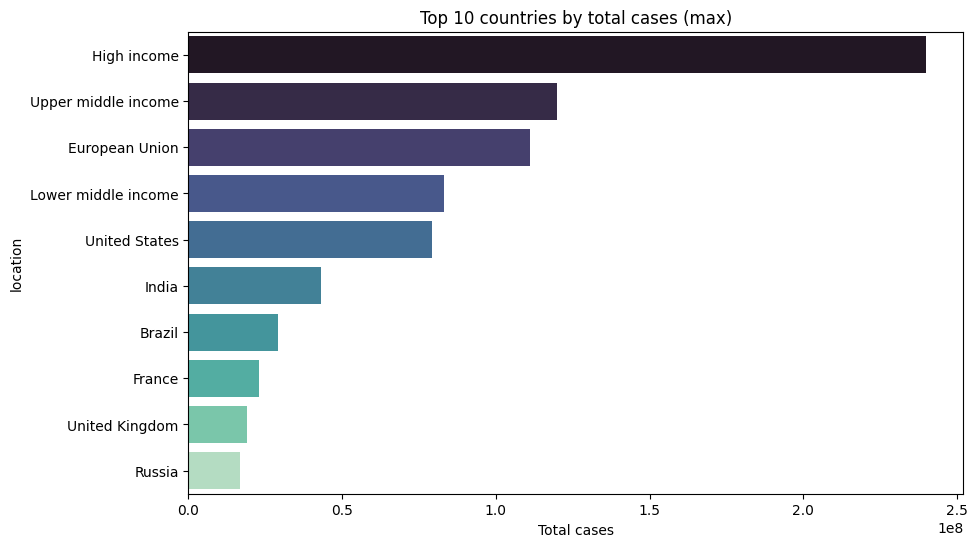

In [37]:
top10 = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette='mako')
plt.title('Top 10 countries by total cases (max)')
plt.xlabel('Total cases')
plt.show()


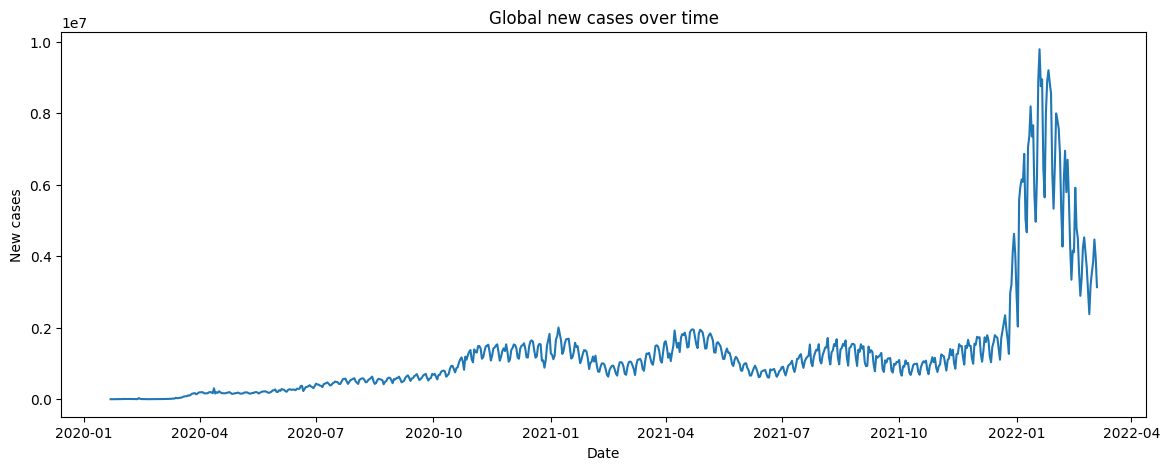

In [38]:
global_new = df.groupby('date')['new_cases'].sum().fillna(0)
plt.figure(figsize=(14,5))
plt.plot(global_new.index, global_new.values)
plt.title('Global new cases over time')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.show()


/tmp/ipython-input-671201607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_per_mil.values, y=top10_per_mil.index, palette='viridis')


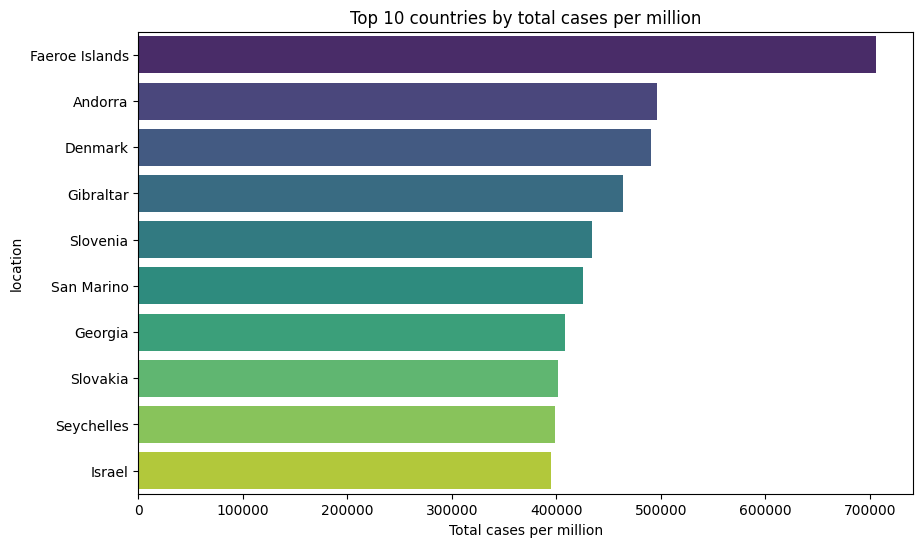

In [39]:
if 'total_cases_per_million' not in df.columns:
    df['total_cases_per_million'] = (df['total_cases'] / df['population']) * 1e6

top10_per_mil = df.groupby('location')['total_cases_per_million'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_per_mil.values, y=top10_per_mil.index, palette='viridis')
plt.title('Top 10 countries by total cases per million')
plt.xlabel('Total cases per million')
plt.show()


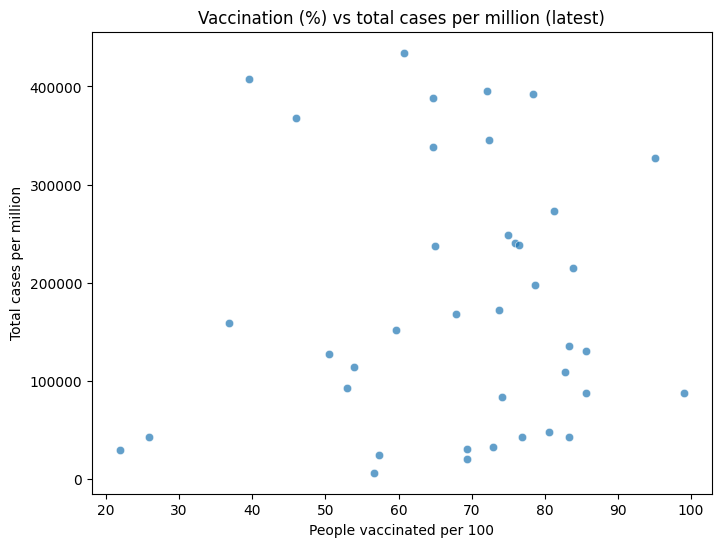

In [40]:
latest = df.sort_values('date').groupby('location').tail(1)

plt.figure(figsize=(8,6))
sns.scatterplot(x='people_vaccinated_per_hundred', y='total_cases_per_million', data=latest, alpha=0.7)
plt.title('Vaccination (%) vs total cases per million (latest)')
plt.xlabel('People vaccinated per 100')
plt.ylabel('Total cases per million')
plt.show()


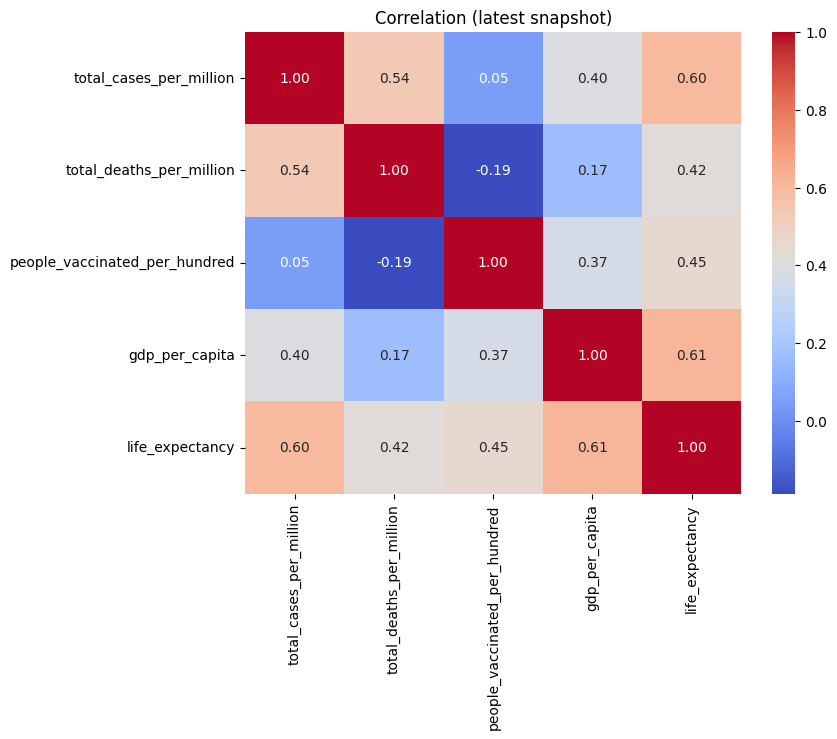

In [41]:
features = ['total_cases_per_million','total_deaths_per_million','people_vaccinated_per_hundred','gdp_per_capita','life_expectancy']
corr_df = latest[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation (latest snapshot)')
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

snapshot = latest.copy()

snapshot['total_deaths_per_million'] = (snapshot['total_deaths'] / snapshot['population']) * 1e6
snapshot['people_vaccinated_per_hundred'] = snapshot['people_vaccinated_per_hundred'].fillna(0)

clust_features = ['total_cases_per_million','total_deaths_per_million','people_vaccinated_per_hundred','gdp_per_capita']
X = snapshot[clust_features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


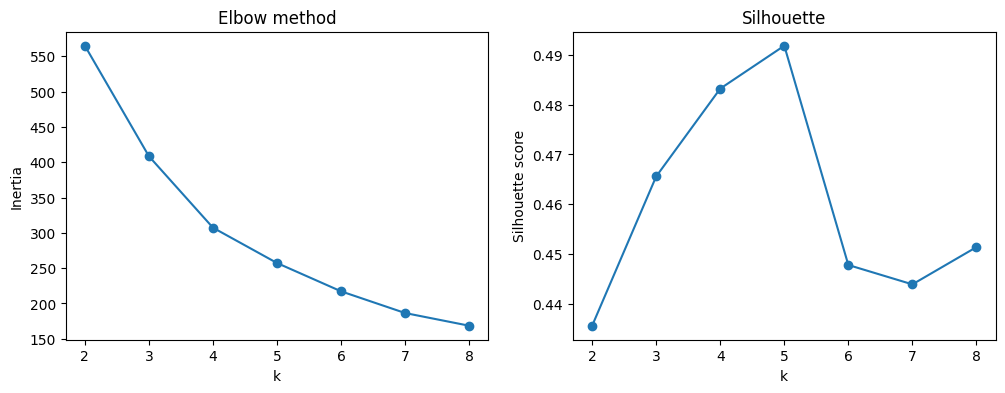

In [24]:
inertia = []
sil_scores = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow method')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, '-o')
plt.xlabel('k'); plt.ylabel('Silhouette score'); plt.title('Silhouette')
plt.show()


In [25]:
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=20)
snapshot['cluster'] = km.fit_predict(X_scaled)

cluster_summary = snapshot.groupby('cluster')[clust_features].median()
display(cluster_summary)

for i in range(k):
    print(f"\nCluster {i} sample countries:")
    print(snapshot[snapshot['cluster']==i]['location'].sample(6).values)


,total_cases_per_million,total_deaths_per_million,people_vaccinated_per_hundred,gdp_per_capita
cluster,,,,
0,238116.2840,1980.931521,0.00,25723.0665
1,13715.1375,179.738174,0.00,5591.5970
2,155423.0725,1610.992719,73.99,27576.6705



Cluster 0 sample countries:
['Kuwait' 'Slovakia' 'Suriname' 'Sweden' 'Seychelles' 'Moldova']

Cluster 1 sample countries:
['Fiji' 'Anguilla' 'Mauritania' 'Benin' 'Wallis and Futuna' 'Morocco']

Cluster 2 sample countries:
['Nepal' 'Canada' 'Kosovo' 'European Union' 'United Arab Emirates'
 'Panama']


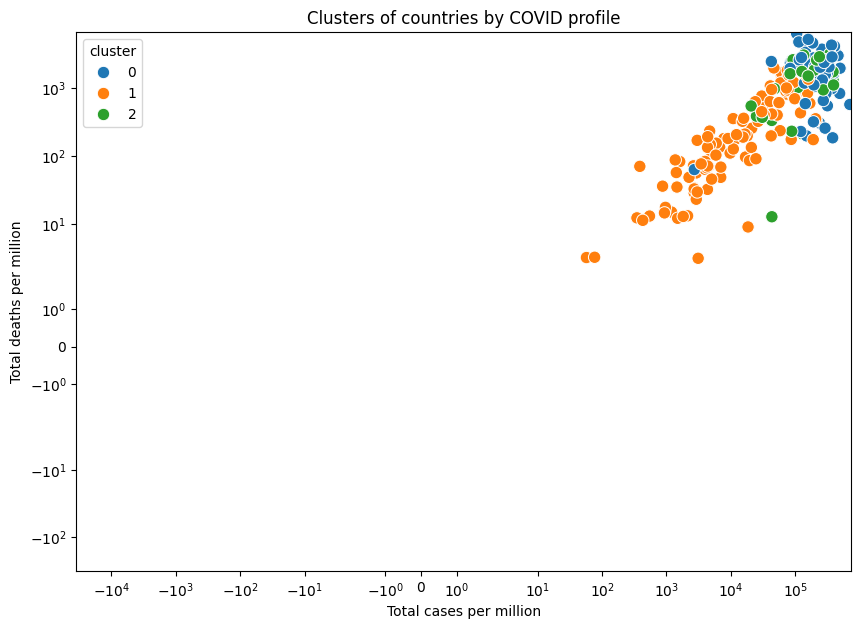

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='total_cases_per_million', y='total_deaths_per_million', hue='cluster', data=snapshot, palette='tab10', s=80)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title('Clusters of countries by COVID profile')
plt.xlabel('Total cases per million')
plt.ylabel('Total deaths per million')
plt.legend(title='cluster')
plt.show()
